## Instalamos Liberías

In [ ]:
# ! pip install pandas
# ! pip install numpy
# ! pip install matplotlib seaborn
# ! pip install openpyxl
# ! pip install seaborn
# ! pip install scipy

In [ ]:
# ! pip install scikit-learn

## Seteamos VSC para una mejor visualización de DF

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler

# Mostrar todas las columnas sin límite
pd.set_option('display.max_columns', None)

# Mostrar más filas (puedes ajustar el número si lo necesitas)
pd.set_option('display.max_rows', 100)

# Aumentar el ancho total de la pantalla para que no se corten las columnas
pd.set_option('display.width', 1200)

# Mostrar el contenido completo de las columnas de texto
pd.set_option('display.max_colwidth', None)

# Formato legible para números decimales (sin notación científica)
pd.set_option('display.float_format', '{:,.2f}'.format)


## Cargamos archivos Xlxs

In [2]:
# Cargar archivos Excel

productos = pd.read_excel('Productos.xlsx')
clientes = pd.read_excel('Clientes.xlsx')
ventas = pd.read_excel('Ventas.xlsx')
detalle_ventas = pd.read_excel('Detalle_ventas.xlsx')

# Mostrar las primeras filas para verificar

print("Productos:")
print(productos.shape)
display(productos.head())

print("\nClientes:")
print(clientes.shape)
display(clientes.head())

print("\nVentas:")
print(ventas.shape)
display(ventas.head())

print("\nDetalle de Ventas:")
print(detalle_ventas.shape)
display(detalle_ventas.head())

Productos:
(100, 4)


,id_producto,nombre_producto,categoria,precio_unitario
0,1,Coca Cola 1.5L,Alimentos,2347
1,2,Pepsi 1.5L,Limpieza,4973
2,3,Sprite 1.5L,Alimentos,4964
3,4,Fanta Naranja 1.5L,Limpieza,2033
4,5,Agua Mineral 500ml,Alimentos,4777



Clientes:
(100, 5)


,id_cliente,nombre_cliente,email,ciudad,fecha_alta
0,1,Mariana Lopez,mariana.lopez@mail.com,Carlos Paz,2023-01-01
1,2,Nicolas Rojas,nicolas.rojas@mail.com,Carlos Paz,2023-01-02
2,3,Hernan Martinez,hernan.martinez@mail.com,Rio Cuarto,2023-01-03
3,4,Uma Martinez,uma.martinez@mail.com,Carlos Paz,2023-01-04
4,5,Agustina Flores,agustina.flores@mail.com,Cordoba,2023-01-05



Ventas:
(120, 6)


,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr
2,3,2024-01-13,20,Tomas Acosta,tomas.acosta@mail.com,tarjeta
3,4,2024-02-27,36,Martina Molina,martina.molina@mail.com,transferencia
4,5,2024-06-11,56,Bruno Diaz,bruno.diaz@mail.com,tarjeta



Detalle de Ventas:
(343, 6)


,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe
0,1,90,Toallas Húmedas x50,1,2902,2902
1,2,82,Aceitunas Negras 200g,5,2394,11970
2,2,39,Helado Vainilla 1L,5,469,2345
3,2,70,Fernet 750ml,2,4061,8122
4,2,22,Medialunas de Manteca,1,2069,2069


## Limpieza de Datos

Datos duplicados : 
0
0
0
0

Datos nulos en productos : 
id_producto        0
nombre_producto    0
categoria          0
precio_unitario    0
dtype: int64

Datos nulos en ventas : 
id_venta          0
fecha             0
id_cliente        0
nombre_cliente    0
email             0
medio_pago        0
dtype: int64

Datos nulos en clientes : 
id_cliente        0
nombre_cliente    0
email             0
ciudad            0
fecha_alta        0
dtype: int64

Datos nulos en detalle_ventas : 
id_venta           0
id_producto        0
nombre_producto    0
cantidad           0
precio_unitario    0
importe            0
dtype: int64
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_producto      100 non-null    int64 
 1   nombre_producto  100 non-null    object
 2   categoria        100 non-null    object
 3   precio_unitario  100 non-null    int64

C:\Users\jalgendones\AppData\Local\Temp\ipykernel_20916\1392882066.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  detalle_ventas['importe'].clip(lower=lower_bound, upper=upper_bound, inplace=True)
C:\Users\jalgendones\AppData\Local\Temp\ipykernel_20916\1392882066.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13602.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  detalle_ventas['importe'].c

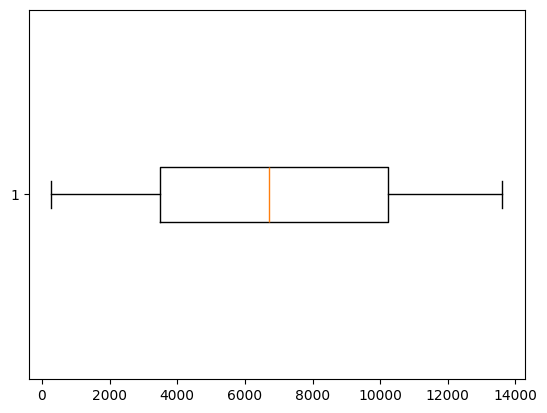

In [3]:
# Verificamos si existen datos duplicados

print("Datos duplicados : ")
print(productos.duplicated().sum())
print(clientes.duplicated().sum())
print(ventas.duplicated().sum())
print(detalle_ventas.duplicated().sum())

# Eliminamos datos duplicados sobre el mismo data frame

productos.drop_duplicates(inplace=True)
clientes.drop_duplicates(inplace=True)
ventas.drop_duplicates(inplace=True)
detalle_ventas.drop_duplicates(inplace=True)

# Verificamos datos nulos

print("\nDatos nulos en productos : ")
print(productos.isna().sum())
print("\nDatos nulos en ventas : ")
print(ventas.isna().sum())
print("\nDatos nulos en clientes : ")
print(clientes.isna().sum())
print("\nDatos nulos en detalle_ventas : ")
print(detalle_ventas.isna().sum())

# Verificamos que todos los datos tengan el type de dato correcto para el análisis

print(" ")
print(productos.info())
print(" ")
print(ventas.info())
print(" ")
print(clientes.info())
print(" ")
print(detalle_ventas.info())

# Verificamos si existen outliers en la columna importe de la tabla detalle_ventas

Q1 = detalle_ventas['importe'].quantile(.25)
Q3 = detalle_ventas['importe'].quantile(.75)

IQR = Q1 - Q3

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = detalle_ventas[(detalle_ventas['importe'] < lower_bound) | (detalle_ventas['importe'] > upper_bound)]

# Retiramos los outliers del df

detalle_ventas['importe'].clip(lower=lower_bound, upper=upper_bound, inplace=True)

plt.boxplot(detalle_ventas['importe'], vert=False) 
plt.show()

## Unir las Tablas para un análisis más sencillo

In [6]:
# 1. Unir ventas con clientes
ventas_clientes = ventas.merge(clientes, on = 'id_cliente', how = 'left')

# 2. Unir tabla anterior con Detalle de ventas
ventas_clientes_detalle = ventas_clientes.merge(detalle_ventas, on = 'id_venta', how = 'left')

# 3. Unir tabla anterior con productos
ventas_final= ventas_clientes_detalle.merge(productos, on = 'id_producto', how = 'left')

# 4. Se verifica si hay columnas iguales mediante el siguiente codigo:
ventas_final['nombre_cliente_x'].equals(ventas_final['nombre_cliente_y'])

# 5. Eliminamos columnas repetidas
ventas_final.drop(columns=['nombre_cliente_y', 'email_y','nombre_producto_y', 'precio_unitario_y'], inplace=True)

# 6. Renombramos algunas columnas para mejor identificación
ventas_final.rename(columns={'nombre_cliente_x': 'nombre_cliente', 'email_x': 'email', 'nombre_producto_x': 'nombre_producto', 'precio_unitario_x': 'precio_unitario'} , inplace=True)

# Mostrar las primeras filas del DataFrame final
print("Tabla combinada de Ventas:")
display(ventas_final.head())

# Exportamos en archivo .csv
# ventas_final.to_csv('Base de datos limpio') # Desbloquear

Tabla combinada de Ventas:


,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago,ciudad,fecha_alta,id_producto,nombre_producto,cantidad,precio_unitario,importe,categoria
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta,Carlos Paz,2023-03-03,90,Toallas Húmedas x50,1,2902,"2,902.00",Limpieza
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,Rio Cuarto,2023-02-18,82,Aceitunas Negras 200g,5,2394,"11,970.00",Limpieza
2,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,Rio Cuarto,2023-02-18,39,Helado Vainilla 1L,5,469,"2,345.00",Alimentos
3,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,Rio Cuarto,2023-02-18,70,Fernet 750ml,2,4061,"8,122.00",Limpieza
4,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,Rio Cuarto,2023-02-18,22,Medialunas de Manteca,1,2069,"2,069.00",Limpieza


## Calcular estadísticas básicas

In [7]:
# Calculos generales

print("============================================")
print('ANÁLISIS DESCRIPTIVO DE VENTAS: ')
print("============================================\n")

print("Resumen estadístico general de importes :\n")
print(ventas_final['importe'].describe())
print("\n--------------------------------------------")
print(f"Media: {ventas_final['importe'].mean():.2f}")
print(f"Mediana: {ventas_final['importe'].median():.2f}")
print(f"Moda: {ventas_final['importe'].mode()[0]}")
print("--------------------------------------------")
print(f"Varianza: {ventas_final['importe'].var():.2f}")
print(f"Desviación estándar: {ventas_final['importe'].std():.2f}")
print(f"Rango (máx - mín): {ventas_final['importe'].max() - ventas_final['importe'].min():.2f}\n")
print("============================================")


print(f'El metodo de pago más utilizado fue : {ventas_final['medio_pago'].mode()[0]}')
print(f'El cliente más frecuente fue : {ventas_final['nombre_cliente'].mode()[0]}')

## Calculos agrupados

#Con respecto a clientes

# Agrupar por nombre del cliente y sumar el importe total
total_por_cliente = ventas_final.groupby('nombre_cliente')['importe'].sum()

# Encontrar el cliente con el mayor importe
cliente_top = total_por_cliente.idxmax()
importe_top = total_por_cliente.max()

# Mostrar resultado
print(f"El cliente que más pagó fue: {cliente_top} y pagó: {importe_top:,.2f} pesos")

#Con respecto a productos

top_producto = ventas_final.groupby('nombre_producto')['importe'].sum()

print("============================================\n")
print("Top de productos más vendidos :\n")

print(top_producto.sort_values(ascending=False).head(5))

print(f"\nEl producto con mayor rotación fue : {ventas_final['nombre_producto'].mode()[0]}\n")
print("============================================\n")

# Agrupar por ciudad y sumar el importe total
top_ciudad = ventas_final.groupby('ciudad')['importe'].sum()

# Encontrar la ciudad con mayor ingreso y menor ingreso
ciudad_top = top_ciudad.idxmax()
ciudad_top_importe = top_ciudad.max()
ciudad_bottom = top_ciudad.idxmin()
ciudad_bottom_importe = top_ciudad.min()

print(f"La ciudad que tuvo mayores ingresos fue : {ciudad_top}, con un aporte total de {ciudad_top_importe:.2f} pesos") 
print(f"La ciudad que tuvo menores ingresos fue : {ciudad_bottom}, con un aporte total de {ciudad_bottom_importe:.2f} pesos\n") 

print("============================================\n")
print("Agregar algún análisis por categoría\n")


ANÁLISIS DESCRIPTIVO DE VENTAS: 

Resumen estadístico general de importes :

count      343.00
mean     7,164.47
std      4,170.53
min        272.00
25%      3,489.00
50%      6,702.00
75%     10,231.50
max     13,602.75
Name: importe, dtype: float64

--------------------------------------------
Media: 7164.47
Mediana: 6702.00
Moda: 13602.75
--------------------------------------------
Varianza: 17393289.26
Desviación estándar: 4170.53
Rango (máx - mín): 13330.75

El metodo de pago más utilizado fue : efectivo
El cliente más frecuente fue : Agustina Flores
El cliente que más pagó fue: Agustina Flores y pagó: 123,998.25 pesos

Top de productos más vendidos :

nombre_producto
Queso Rallado 150g           85,580.25
Desodorante Aerosol          82,551.00
Yerba Mate Suave 1kg         67,954.25
Pizza Congelada Muzzarella   67,269.00
Ron 700ml                    64,064.25
Name: importe, dtype: float64

El producto con mayor rotación fue : Queso Rallado 150g


La ciudad que tuvo mayores ingres

In [8]:
ventas_final.sort_values(by=['importe'], ascending=False , inplace=True)
display(ventas_final.head())

# ventas_final.to_excel('BD.xlsx', index = False)

,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago,ciudad,fecha_alta,id_producto,nombre_producto,cantidad,precio_unitario,importe,categoria
308,110,2024-05-19,92,Mariana Rodriguez,mariana.rodriguez@mail.com,efectivo,Alta Gracia,2023-04-02,6,Jugo de Naranja 1L,5,4170,"13,602.75",Limpieza
305,109,2024-06-04,64,Julian Alvarez,julian.alvarez@mail.com,transferencia,Villa Maria,2023-03-05,44,Arroz Largo Fino 1kg,5,2979,"13,602.75",Limpieza
18,8,2024-01-06,66,Tomas Herrera,tomas.herrera@mail.com,transferencia,Villa Maria,2023-03-07,18,Queso Rallado 150g,4,3444,"13,602.75",Limpieza
22,10,2024-05-28,52,Diego Diaz,diego.diaz@mail.com,qr,Rio Cuarto,2023-02-21,100,Trapo de Piso,4,4854,"13,602.75",Limpieza
54,21,2024-06-19,10,Karina Acosta,karina.acosta@mail.com,transferencia,Cordoba,2023-01-10,76,Pizza Congelada Muzzarella,5,4286,"13,602.75",Limpieza


# Distribución de variables

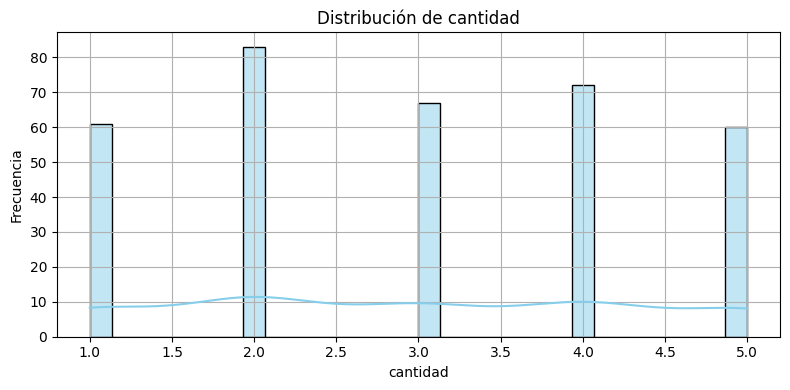


📊 Análisis de la columna: cantidad
Estadístico de Shapiro-Wilk: 0.8953
Valor p: 0.0000
⚠️ La distribución no es normal.



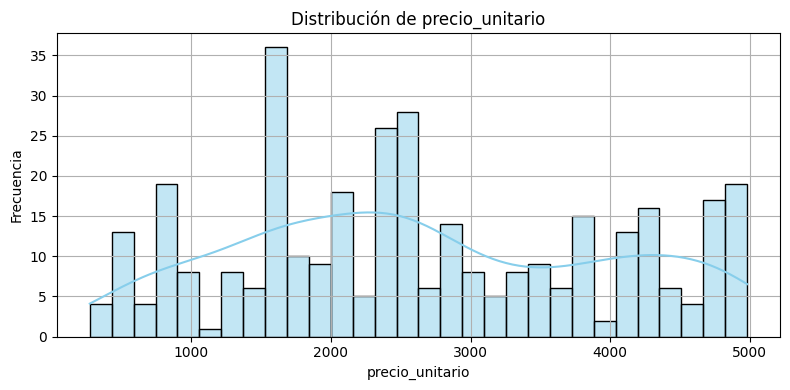


📊 Análisis de la columna: precio_unitario
Estadístico de Shapiro-Wilk: 0.9565
Valor p: 0.0000
⚠️ La distribución no es normal.



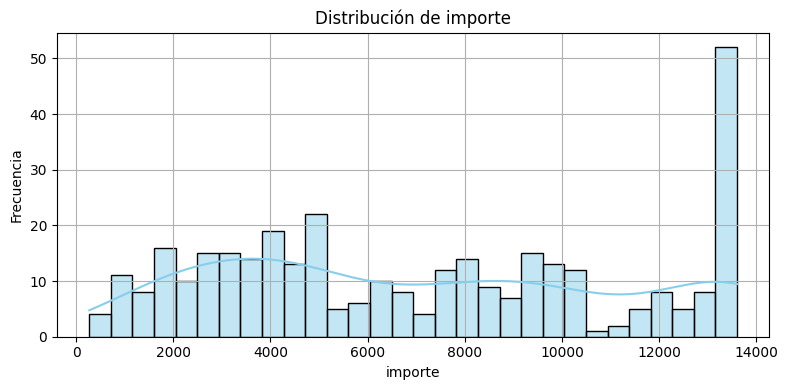


📊 Análisis de la columna: importe
Estadístico de Shapiro-Wilk: 0.9228
Valor p: 0.0000
⚠️ La distribución no es normal.



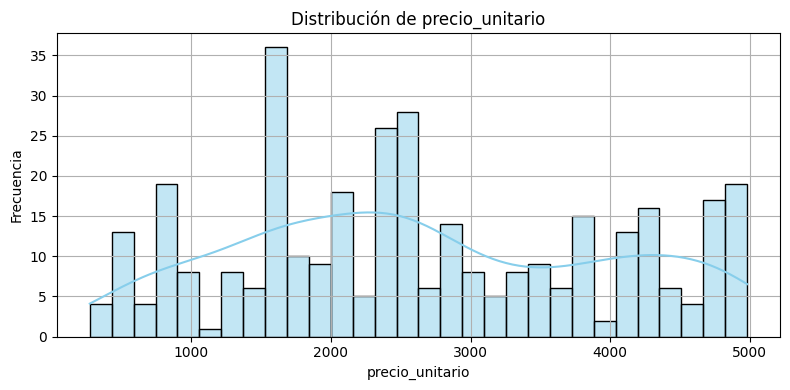


📊 Análisis de la columna: precio_unitario
Estadístico de Shapiro-Wilk: 0.9565
Valor p: 0.0000
⚠️ La distribución no es normal.



In [9]:
# Lista de columnas numéricas que analizaremos 
columnas_numericas = ['cantidad', 'precio_unitario', 'importe', 'precio_unitario']

def analizar_distribucion(columna):
    datos = ventas_final[columna].dropna()
    
    # Histograma con curva KDE
    plt.figure(figsize=(8, 4))
    sns.histplot(datos, kde=True, bins=30, color='skyblue')
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Prueba de normalidad
    stat, p = shapiro(datos)
    print(f'\n📊 Análisis de la columna: {columna}')
    print(f'Estadístico de Shapiro-Wilk: {stat:.4f}')
    print(f'Valor p: {p:.4f}')
    if p > 0.05:
        print('✅ La distribución parece ser normal.\n')
    else:
        print('⚠️ La distribución no es normal.\n')


for col in columnas_numericas:
    analizar_distribucion(col)


# Correlación entre variables

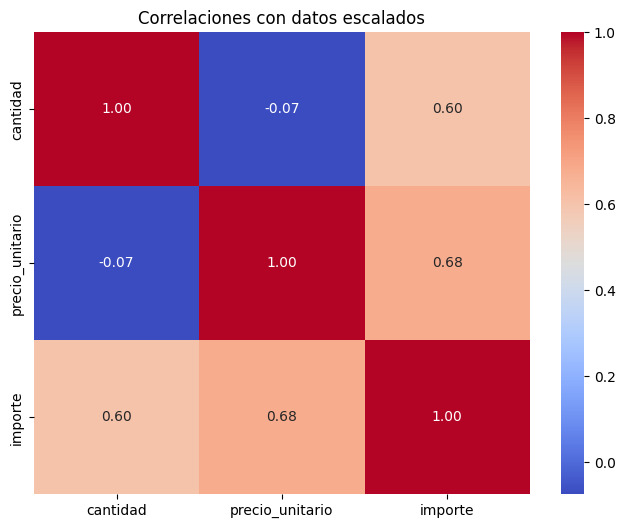

In [10]:
# Preparamos variables a evaluar
variables = ['cantidad', 'precio_unitario', 'importe']
datos = ventas_final[variables].dropna()

# Escalar los datos
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(datos)

# Convertir a DataFrame
df_escalado = pd.DataFrame(datos_escalados, columns=variables)

# Calcular correlaciones
correlaciones = df_escalado.corr()

# Mostrar mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlaciones con datos escalados')
plt.show()

# Visualizamos algunas variables

## Grafico de lineas

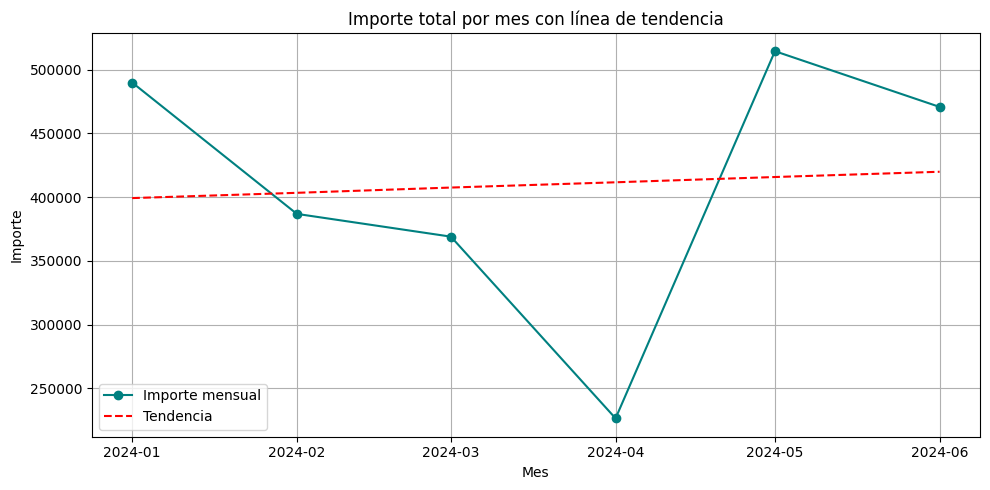

Crecimiento mensual proyectado: 0.88%
Crecimiento acumulado en 6 meses: 5.40% // Objetivo: 12.50%


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Asegúrate de que la columna de fecha esté en formato datetime
ventas_final['fecha'] = pd.to_datetime(ventas_final['fecha'])

# Crear columna de mes
ventas_final['mes'] = ventas_final['fecha'].dt.to_period('M')
df_mensual = ventas_final.groupby('mes')['importe'].sum().reset_index()
df_mensual['mes'] = df_mensual['mes'].dt.to_timestamp()

# Crear gráfico de línea
plt.figure(figsize=(10, 5))
plt.plot(df_mensual['mes'], df_mensual['importe'], marker='o', linestyle='-', label='Importe mensual', color='teal')

# Calcular línea de tendencia
x = np.arange(len(df_mensual))
y = df_mensual['importe'].values
coef = np.polyfit(x, y, 1)  # Regresión lineal
tendencia = np.poly1d(coef)

# Graficar línea de tendencia
plt.plot(df_mensual['mes'], tendencia(x), linestyle='--', color='red', label='Tendencia')

# Personalizar gráfico
plt.title('Importe total por mes con línea de tendencia')
plt.xlabel('Mes')
plt.ylabel('Importe')
plt.grid(True)
plt.xticks()
plt.legend()
plt.tight_layout()
plt.show()

# Agrupar por mes
ventas_final['mes'] = ventas_final['fecha'].dt.to_period('M')
df_mensual = ventas_final.groupby('mes')['importe'].sum().reset_index()
df_mensual['mes'] = df_mensual['mes'].dt.to_timestamp()

# Crear variable de tiempo
df_mensual['mes_num'] = np.arange(len(df_mensual))

# Regresión lineal
x = df_mensual['mes_num']
y = df_mensual['importe']
coef = np.polyfit(x, y, 1)  # coef[0] = pendiente, coef[1] = intercepto

# Último valor real
ultimo_valor_real = y.iloc[-1]

# Calcular crecimiento porcentual mensual
crecimiento_porcentual_mes = (coef[0] / ultimo_valor_real) * 100

# Calcular crecimiento porcentual semestral
# Tasa de crecimiento mensual
r = 0.0088

# Número de meses
n = 6

# Crecimiento acumulado
crecimiento_acumulado = (1 + r) ** n - 1

# Convertir a porcentaje
porcentaje_acumulado = crecimiento_acumulado * 100

print(f"Crecimiento mensual proyectado: {crecimiento_porcentual_mes:.2f}%")
print(f"Crecimiento acumulado en 6 meses: {porcentaje_acumulado:.2f}% // Objetivo: 12.50%")

## Gráficos de Barras

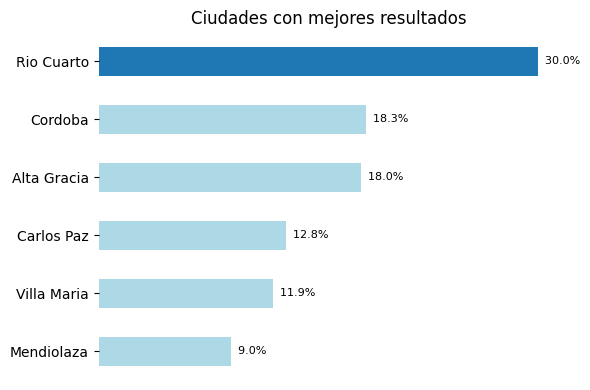

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Ciudades con mejores resultados

importe_ciudad = ventas_final.groupby('ciudad')['importe'].sum().sort_values()
total = importe_ciudad.sum()
colores = ['tab:blue' if x == importe_ciudad.idxmax() else 'lightblue' for x in importe_ciudad.index]

ax = importe_ciudad.plot(
    kind='barh',
    figsize=(6,4),
    color=colores,
    )

plt.title('Ciudades con mejores resultados')
plt.xticks([])
plt.ylabel(None)

for spine in ax.spines.values():
    spine.set_visible(False)

for i, (ciudad, valor) in enumerate(importe_ciudad.items()):
    porcentaje = valor / total * 100
    ax.text(valor, i, f'  {porcentaje:.1f}%', va='center', ha='left', fontsize=8, color='black')

plt.tight_layout()
plt.show()

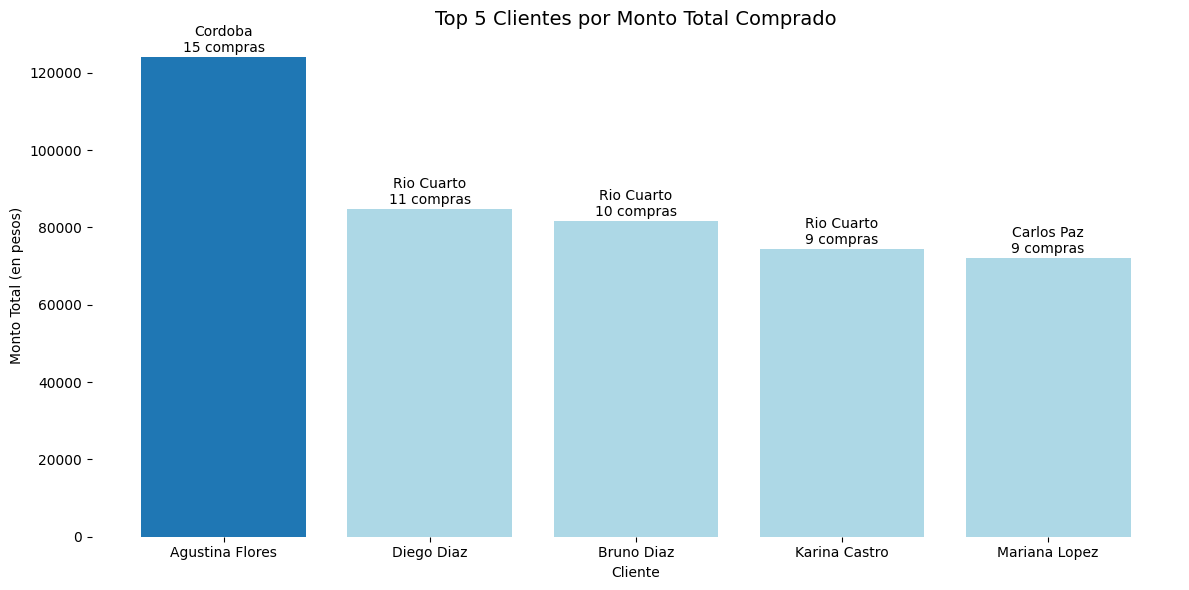

In [13]:
# Agrupar por cliente y ciudad
resumen = ventas_final.groupby(['nombre_cliente', 'ciudad']).agg(
    monto_total=('importe', 'sum'),
    cantidad_compras=('id_venta', 'count')
).reset_index()

# Obtener el top 5 por monto total
top_clientes = resumen.sort_values(by='monto_total', ascending=False).head(5)

# Crear gráfico de barras con tonalidades de azul
colors = ['lightblue'] * 5  # azul claro para todos
colors[0] = 'tab:blue'     # azul fuerte para el cliente top

plt.figure(figsize=(12, 6))
barras = plt.bar(top_clientes['nombre_cliente'], top_clientes['monto_total'], color=colors)

# Agregar etiquetas con ciudad y cantidad de compras
for barra, ciudad, compras in zip(barras, top_clientes['ciudad'], top_clientes['cantidad_compras']):
    altura = barra.get_height()
    etiqueta = f"{ciudad}\n{compras} compras"
    plt.text(barra.get_x() + barra.get_width()/2, altura + 500, etiqueta,
             ha='center', va='bottom', fontsize=10 , color='black')

# Personalizar gráfico
plt.title('Top 5 Clientes por Monto Total Comprado', fontsize=14)
plt.ylabel('Monto Total (en pesos)')
plt.xlabel('Cliente')
plt.xticks(rotation=0)

# Eliminar líneas del marco (cuadrícula)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()


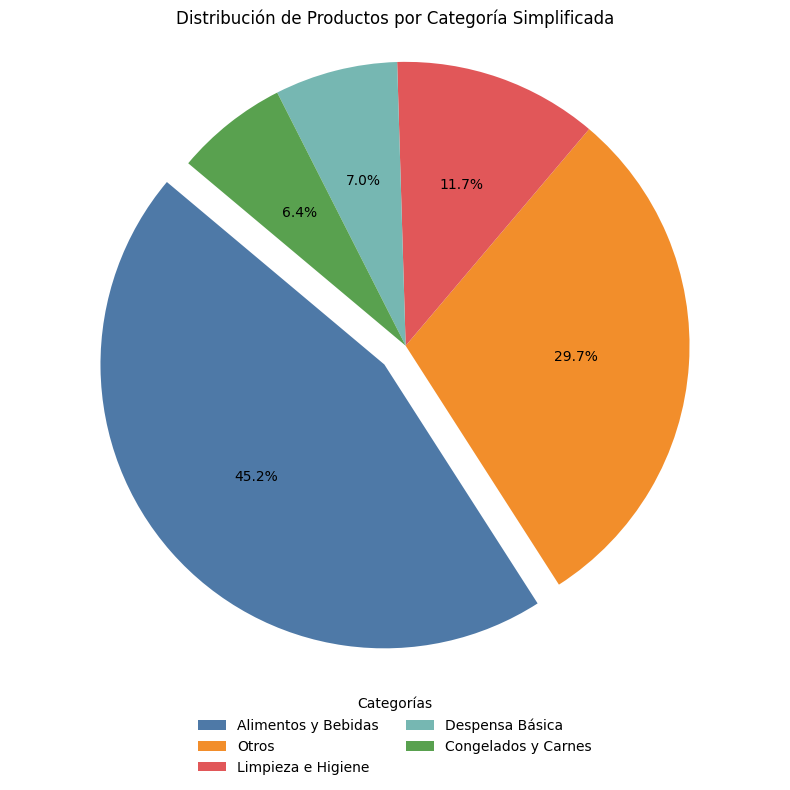

In [21]:

# Función para reclasificar productos
def reclasificar(producto):
    producto = producto.lower()
    if any(p in producto for p in ['jugo', 'agua', 'bebida', 'energética', 'vino', 'cerveza', 'ron', 'whisky', 'gin', 'vodka',
                                   'arroz', 'fideos', 'harina', 'pan', 'galletitas', 'bizcochos', 'alfajor', 'turrón', 'azúcar',
                                   'queso', 'yogur', 'leche', 'manteca', 'crema', 'chocolate', 'café', 'té']):
        return 'Alimentos y Bebidas'
    elif any(p in producto for p in ['lavandina', 'detergente', 'desengrasante', 'trapo', 'servilletas', 'shampoo', 'jabón',
                                     'toallas', 'cepillo', 'mascarilla', 'crema dental', 'hilo dental']):
        return 'Limpieza e Higiene'
    elif any(p in producto for p in ['hamburguesa', 'pollo', 'pescado', 'pizza', 'empanadas', 'helado']):
        return 'Congelados y Carnes'
    elif any(p in producto for p in ['aceite', 'vinagre', 'sal', 'especias', 'miel', 'frutos secos']):
        return 'Despensa Básica'
    else:
        return 'Otros'

# Aplicar reclasificación
ventas_final['categoria_simplificada'] = ventas_final['nombre_producto'].apply(reclasificar)

# Calcular porcentajes
porcentajes = ventas_final['categoria_simplificada'].value_counts(normalize=True) * 100

# Colores de Tableau
tableau_colors = [
    "#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC948"
]

# Crear lista de "explode" para resaltar la categoría top
explode = [0.1 if i == 0 else 0 for i in range(len(porcentajes))]

# Crear gráfico de pastel
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    porcentajes,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=tableau_colors[:len(porcentajes)],
    explode=explode
)

# Agregar leyenda debajo del gráfico SIN borde
ax.legend(
    wedges,
    porcentajes.index,
    title="Categorías",
    loc='upper center',
    bbox_to_anchor=(0.5, -0.01),
    ncol=2,
    fontsize=10,
    frameon=False  # 👈 Esto elimina el cuadro de la leyenda
)

# Título y formato
plt.title('Distribución de Productos por Categoría Simplificada')
plt.axis('equal')
plt.tight_layout()
plt.show()

ventas_final.to_excel("Base de datos Limpia.xlsx", index=False)

# CONCLUSIONES

# 📊 Análisis y Recomendaciones para Alcanzar el 12% de Crecimiento

## **1. Análisis de la Situación Actual**
- **Tendencia de ventas:**  
  Crecimiento proyectado leve (≈5.40%) con alta volatilidad. Caída fuerte en abril y recuperación en mayo. Falta estabilidad.
  
- **Ciudades con mejores resultados:**  
  - **Rio Cuarto:** 30%  
  - **Córdoba:** 18.3%  
  - **Alta Gracia:** 18%  
  - **Carlos Paz:** 12.8%  
  - **Villa María:** 11.9%  
  - **Mendiolaza:** 9%  
  → Alta concentración en Rio Cuarto y Córdoba. Oportunidad en ciudades débiles.

- **Top clientes:**  
  - **Agustina Flores (Córdoba):** >120,000 pesos (15 compras)  
  - Otros clientes muy por debajo → Alta dependencia de pocos clientes.

- **Distribución por categoría:**  
  - **Alimentos y Bebidas:** 45.2%  
  - **Despensa Básica:** 29.7%  
  - **Limpieza e Higiene:** 11.7%  
  - **Congelados y Carnes:** 6.4%  
  - **Otros:** 7%  
  → Mix poco diversificado, oportunidad en categorías pequeñas.

---

## **2. Conclusiones Clave**
- Dependencia geográfica (Rio Cuarto y Córdoba).
- Dependencia de clientes grandes (riesgo alto).
- Mix de productos concentrado en dos categorías.
- Crecimiento actual insuficiente para meta del 12.5%.

---

## **3. Recomendaciones Estratégicas**
### **A. Geografía**
- **Expandir en ciudades débiles:**  
  Campañas locales en Villa María y Mendiolaza (promos, influencers, alianzas).
- **Fortalecer ciudades medias:**  
  Alta Gracia y Carlos Paz con estrategias de fidelización.

### **B. Clientes**
- **Programa de fidelización y referidos:**  
  Incentivar clientes top para atraer nuevos compradores.
- **Segmentación y upselling:**  
  Ofrecer combos premium a clientes medianos para aumentar ticket promedio.

### **C. Mix de Productos**
- **Impulsar categorías pequeñas:**  
  Congelados y Carnes → packs familiares, suscripciones.
- **Cross-selling:**  
  Combos entre Alimentos y Limpieza para aumentar frecuencia.

### **D. Marketing y Ventas**
- **Campañas digitales segmentadas:**  
  Anuncios hiperlocales según ciudad y categoría.
- **Promociones temporales:**  
  Aprovechar estacionalidad (fiestas, verano).
- **Contenido educativo:**  
  Recetas, tips de limpieza para engagement.

### **E. KPI y Seguimiento**
- Medir crecimiento por ciudad y categoría mensualmente.
- Reducir dependencia de top clientes (ninguno >10% del total).

---


In [ ]:
! pip install nbconvert

In [70]:
! jupyter nbconvert --to markdown "Análisis.ipynb"

[NbConvertApp] Converting notebook Análisis.ipynb to markdown
[NbConvertApp] Support files will be in Análisis_files\
[NbConvertApp] Making directory Análisis_files
[NbConvertApp] Writing 35653 bytes to Análisis.md
